In [1]:

import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

#x_train is being read in as housing

housing = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\x_train.csv',index_col=0)

x_test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\x_text.csv',index_col=0)

y_train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_train.csv',index_col=0)

df_dummies = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\df_dummies.csv',index_col=0)
# y_test.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_test.csv',index_col=0)

In [3]:
housing.shape

(1784, 249)

In [4]:
housing2 = housing.copy()

In [6]:
housing2.loc[housing2['Neighborhood']== 'GrnHill']

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1784 entries, 1232 to 1679
Columns: 249 entries, GrLivArea to SaleCondition_Partial
dtypes: bool(3), float64(13), int64(208), object(25)
memory usage: 3.4+ MB


In [9]:
pd.set_option('display.max_columns', None)


housing.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_price,bc_GrLivArea,has_pool,has_miscfeature,alley_access,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mixed,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1232,1664,162900,60,RL,78.0,10140,Pave,4,Lvl,AllPub,Inside,3,NWAmes,Norm,Norm,1Fam,2Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,PConc,4,3,0,6,194.0,1,0.0,638.0,832.0,GasA,3,Y,SBrkr,832,832,0,0.0,0.0,2,1,4,1,3,8,8,1,3,Attchd,1976.0,RFn,2.0,528.0,3,3,Y,0,28,0,0,259,0,GdWo,0,3,2006,WD,Normal

In [154]:
housing.SalePrice.head()
# housing.drop({'SalePrice'})

1232    162900
2381    133000
810     189000
863     290000
1346    143000
Name: SalePrice, dtype: int64

In [156]:
housing.shape

(1784, 249)

In [155]:
# x_test.drop({'SalePrice'})
x_test.SalePrice.head()

1140    175900
398     147500
894     192000
2422    197900
2548    110000
Name: SalePrice, dtype: int64

In [13]:
x_test.shape

(765, 249)

In [14]:
y_train.shape
type(y_train)
y_train.head()
SalePrice = y_train.SalePrice
price = y_train.SalePrice
type(SalePrice)

pandas.core.series.Series

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

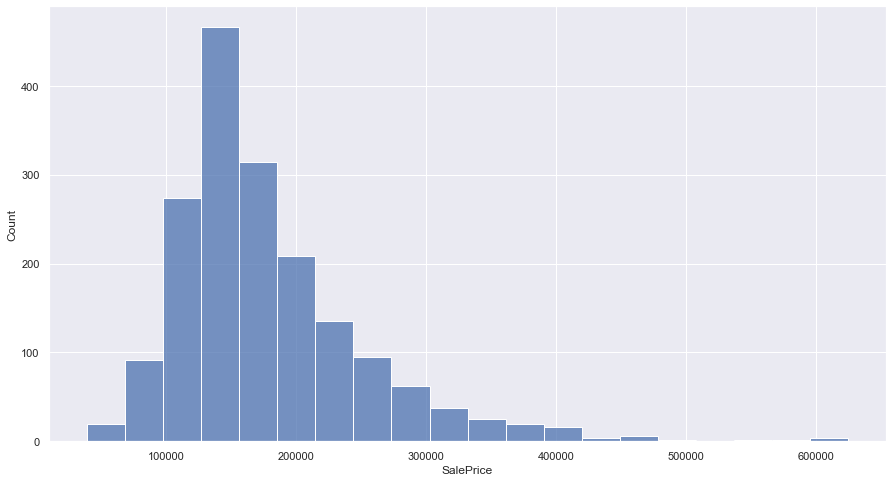

In [162]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(housing.SalePrice, bins=20)

In [17]:
log_price = np.log(SalePrice)

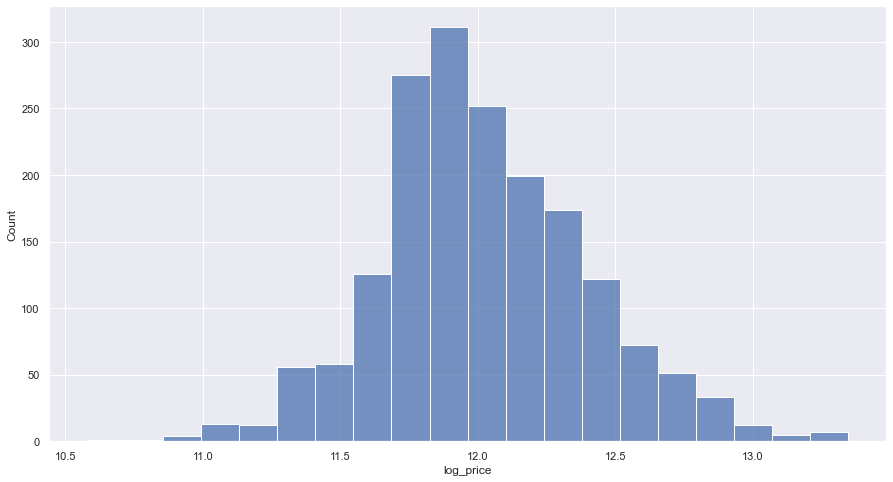

In [161]:
sns.histplot(log_price, bins=20);

In [19]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(2),
        'Cumulative_Frequency': datax.values.cumsum(),
        'Cumulative_Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
    #datay.set_index(variable_)
    #return(datay.set_index(variable_))
    return(datay)

In [20]:
def miss_cols(df):
    missing = np.sum(df.isnull(),axis=0)
    
    miss_ind = np.sum(df.isnull(),axis=0) > 0
    
    vals = pd.Series(filter(lambda x: x != 0,missing))
     
    cols_miss = df.columns[miss_ind]

    L=list(zip(cols_miss,vals, round(vals/df.shape[0],4)))
    
    return sorted(L,reverse=True,key=lambda x: x[2])  

In [152]:
def categ_check(
df_name = None,
target_median = None,
categ_feature = None,
target = None):

    df1 = df_name.groupby([categ_feature])[target].median().reset_index()
    df1 = df1.rename(columns={target:'median_of_target'})

    df1['index'] = (df1['median_of_target']/target_median*100).astype(int)

    df2= df_name[[categ_feature,target]]
    df2 = df2.groupby([categ_feature]).count().reset_index()
    df2 = df2.rename(columns={target:'category_freq'})

    df2['pct_total'] = df2['category_freq']/df_name.shape[0]*100

    df3 = pd.merge(df2,df1)

    df4 = df3.sort_values(by=['index'], ascending=False).reset_index()
    df4 = df4.drop(columns=['level_0'])
    return df4

In [21]:
missing = np.sum(housing.isnull(),axis=0)
missing.head()

GrLivArea        0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage    310
dtype: int64

In [22]:
miss_cols(housing) #list of columns with missing values and the quantity of missing values for housing df

[('LotFrontage', 310, 0.1738),
 ('GarageYrBlt', 94, 0.0527),
 ('MasVnrArea', 9, 0.005),
 ('BsmtFullBath', 1, 0.0006),
 ('BsmtHalfBath', 1, 0.0006),
 ('GarageCars', 1, 0.0006),
 ('GarageArea', 1, 0.0006)]

In [24]:

proc_freq(housing,'MSZoning')

,MSZoning,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,FV,78,4.37,78,4.37
1,RH,13,0.73,91,5.10
2,RL,1397,78.31,1488,83.41
3,RM,296,16.59,1784,100.00


In [25]:
list(housing.columns)

['GrLivArea',
 'SalePrice',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 

#### try to impute LotFrontage using linear regression

In [27]:
housing.LotFrontage.corr(housing.LotArea)

0.5400416989821826

In [163]:
housing.LotFrontage.corr(housing['1stFlrSF'])

0.436130149401068

In [164]:
housing.LotFrontage.corr(housing.GrLivArea)

0.3516585830315819

In [30]:
size_related = housing.filter(regex='SF$|Area$')#filter out columns that end with SF or that end with Area
size_related.columns

Index(['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea', 'bc_GrLivArea'],
      dtype='object')

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_,y_)
lm.score(x_, y_)  #pretty bad model

0.3771083286100565

In [37]:
proc_freq(housing,'Neighborhood')

,Neighborhood,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,Blmngtn,13,0.73,13,0.73
1,Blueste,3,0.17,16,0.90
2,BrDale,20,1.12,36,2.02
3,BrkSide,68,3.81,104,5.83
4,ClearCr,27,1.51,131,7.34
5,CollgCr,170,9.53,301,16.87
6,Crawfor,74,4.15,375,21.02
7,Edwards,112,6.28,487,27.30
8,Gilbert,93,5.21,580,32.51
9,Greens,6,0.34,586,32.85


# 

In [38]:
vars =  ['Neighborhood','LotFrontage']
house= housing[vars]

print(house.groupby(['Neighborhood']).median().reset_index())

# print(house.groupby(['Neighborhood']).count().reset_index())




   Neighborhood  LotFrontage
0       Blmngtn         43.0
1       Blueste         24.0
2        BrDale         21.0
3       BrkSide         52.0
4       ClearCr         81.0
5       CollgCr         70.0
6       Crawfor         70.0
7       Edwards         64.0
8       Gilbert         64.5
9        Greens         40.0
10       IDOTRR         59.5
11      MeadowV         21.0
12      Mitchel         74.0
13        NAmes         73.0
14      NPkVill         24.0
15       NWAmes         80.0
16      NoRidge         85.0
17      NridgHt         94.5
18      OldTown         60.0
19        SWISU         60.0
20       Sawyer         72.0
21      SawyerW         70.0
22      Somerst         73.0
23      StoneBr         47.0
24       Timber         82.0
25      Veenker         80.0


In [41]:
housing3 = housing.copy()

In [43]:

vars =  ['Neighborhood','LotFrontage']
house= housing[vars]

print(house.groupby(['Neighborhood']).median().reset_index())


   Neighborhood  LotFrontage
0       Blmngtn         43.0
1       Blueste         24.0
2        BrDale         21.0
3       BrkSide         52.0
4       ClearCr         81.0
5       CollgCr         70.0
6       Crawfor         70.0
7       Edwards         64.0
8       Gilbert         64.5
9        Greens         40.0
10       IDOTRR         59.5
11      MeadowV         21.0
12      Mitchel         74.0
13        NAmes         73.0
14      NPkVill         24.0
15       NWAmes         80.0
16      NoRidge         85.0
17      NridgHt         94.5
18      OldTown         60.0
19        SWISU         60.0
20       Sawyer         72.0
21      SawyerW         70.0
22      Somerst         73.0
23      StoneBr         47.0
24       Timber         82.0
25      Veenker         80.0


### impute LotFrontage

In [171]:
list_sub = ['Neighborhood','LotFrontage']
housing_sub = housing[list_sub]
housing_sub

,Neighborhood,LotFrontage
1232,NWAmes,78.0
2381,NAmes,60.0
810,Gilbert,60.0
863,NoRidge,92.0
1346,OldTown,50.0
...,...,...
1051,OldTown,NaN
1758,Timber,88.0
778,Gilbert,96.0
851,NAmes,NaN


#### imputation dictionary

In [172]:
imputation_dict = housing_sub.groupby(["Neighborhood"]).median().to_dict()
imputation_dict['LotFrontage']

{'Blmngtn': 43.0,
 'Blueste': 24.0,
 'BrDale': 21.0,
 'BrkSide': 52.0,
 'ClearCr': 81.0,
 'CollgCr': 70.0,
 'Crawfor': 70.0,
 'Edwards': 64.0,
 'Gilbert': 64.5,
 'Greens': 40.0,
 'IDOTRR': 59.5,
 'MeadowV': 21.0,
 'Mitchel': 74.0,
 'NAmes': 73.0,
 'NPkVill': 24.0,
 'NWAmes': 80.0,
 'NoRidge': 85.0,
 'NridgHt': 94.5,
 'OldTown': 60.0,
 'SWISU': 60.0,
 'Sawyer': 72.0,
 'SawyerW': 70.0,
 'Somerst': 73.0,
 'StoneBr': 47.0,
 'Timber': 82.0,
 'Veenker': 80.0}

In [46]:
# imputation_dict
type(housing_sub)

pandas.core.frame.DataFrame

In [173]:
impute_index = housing_sub.LotFrontage.isnull()

housing_sub.loc[impute_index,'LotFrontage'] = housing_sub.loc[impute_index].apply(lambda current_row:imputation_dict['LotFrontage'][(current_row[0])], axis=1)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [49]:
miss_cols(housing_sub)

[]

In [50]:
housing_sub.shape

(1784, 2)

#### Make a copy of housing

In [51]:
housing_copy= housing.copy()


####  do actual imputation of LotFrontage in housing

In [174]:
housing['LotFrontage'] =  housing_sub['LotFrontage']

In [175]:
miss_cols(housing)

[]

In [54]:
list_sub = ['Neighborhood','LotFrontage']
df1 = housing[list_sub]
df1 = df1.groupby(["Neighborhood"]).median().reset_index()


print(type(df1))
# df1 = df1.dropna()


<class 'pandas.core.frame.DataFrame'>


#### LotFrontage median bar graph by neighborhood

[Text(0, 0, 'Blmngtn'),
 Text(1, 0, 'Blueste'),
 Text(2, 0, 'BrDale'),
 Text(3, 0, 'BrkSide'),
 Text(4, 0, 'ClearCr'),
 Text(5, 0, 'CollgCr'),
 Text(6, 0, 'Crawfor'),
 Text(7, 0, 'Edwards'),
 Text(8, 0, 'Gilbert'),
 Text(9, 0, 'Greens'),
 Text(10, 0, 'IDOTRR'),
 Text(11, 0, 'MeadowV'),
 Text(12, 0, 'Mitchel'),
 Text(13, 0, 'NAmes'),
 Text(14, 0, 'NPkVill'),
 Text(15, 0, 'NWAmes'),
 Text(16, 0, 'NoRidge'),
 Text(17, 0, 'NridgHt'),
 Text(18, 0, 'OldTown'),
 Text(19, 0, 'SWISU'),
 Text(20, 0, 'Sawyer'),
 Text(21, 0, 'SawyerW'),
 Text(22, 0, 'Somerst'),
 Text(23, 0, 'StoneBr'),
 Text(24, 0, 'Timber'),
 Text(25, 0, 'Veenker')]

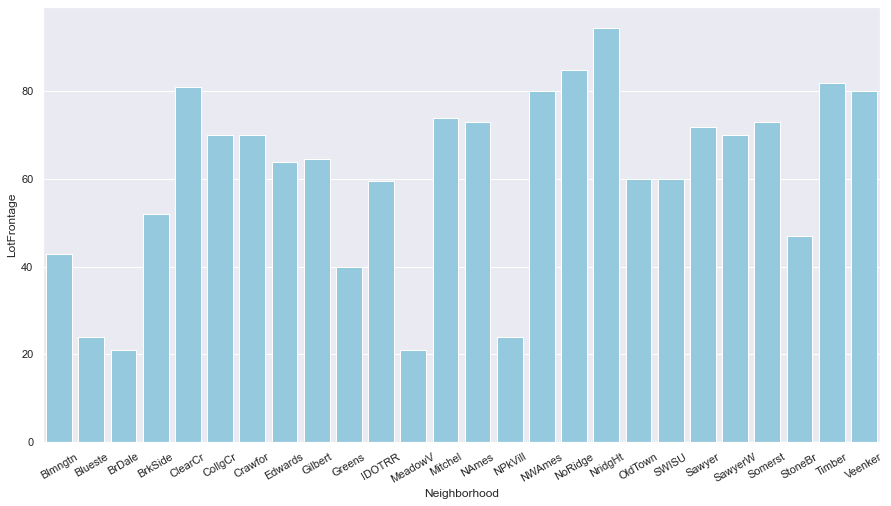

In [165]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(15,8)})



ax = sns.barplot(x=df1["Neighborhood"], y='LotFrontage', data =df1,  color='skyblue', ci=None)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [169]:
housing.MasVnrArea = housing.MasVnrArea.fillna(0)



housing.BsmtFullBath = housing.BsmtFullBath.fillna(0)

housing.BsmtHalfBath = housing.BsmtHalfBath.fillna(0)

housing.BsmtFinSF1 = housing.BsmtFinSF1.fillna(0)

housing.BsmtFinSF2 = housing.BsmtFinSF2.fillna(0)

housing.BsmtUnfSF = housing.BsmtUnfSF.fillna(0)

housing.TotalBsmtSF = housing.TotalBsmtSF.fillna(0)

housing.GarageCars = housing.GarageCars.fillna(0)

housing.GarageArea = housing.GarageArea.fillna(0)

housing.loc[housing['GarageYrBlt'].isnull(),'GarageYrBlt'] = housing['YearBuilt']

In [176]:
miss_cols(housing)

[]

In [62]:
housing2 = housing.copy()

In [177]:
 price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')#filter out columns that end with SF or that end with Area
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,bc_GrLivArea
1232,1664,10140,0.0,638.0,832.0,832,832,0,528.0,0,28,0,9.303792
2381,1268,12144,0.0,457.0,832.0,1036,0,232,288.0,0,28,0,8.886250
810,1628,8400,32.0,100.0,384.0,958,670,0,390.0,48,72,0,9.269942
863,2270,11764,348.0,628.0,1152.0,1164,1106,0,671.0,132,57,0,9.789165
1346,1482,9000,0.0,26.0,650.0,832,650,0,324.0,0,0,0,9.125021


In [64]:
size_related.describe()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,bc_GrLivArea
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,1488.602578,9804.981502,97.079596,535.695628,1034.843049,1139.994395,343.841928,4.766256,465.214686,96.244395,46.339126,1.500000,9.057352
std,487.818064,5009.083106,173.793191,423.857932,414.467452,372.301600,425.356854,48.213441,208.328657,126.945317,67.086378,28.065983,0.493791
min,334.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.931030
25%,1111.750000,7432.000000,0.000000,212.000000,791.750000,876.750000,0.000000,0.000000,315.000000,0.000000,0.000000,0.000000,8.686607
50%,1436.000000,9378.500000,0.000000,442.000000,971.500000,1063.500000,0.000000,0.000000,474.000000,0.000000,25.000000,0.000000,9.076567
75%,1733.250000,11428.250000,156.500000,779.250000,1256.250000,1344.500000,703.000000,0.000000,576.000000,170.000000,70.000000,0.000000,9.367013
max,3820.000000,70761.000000,1600.000000,2153.000000,3206.000000,3820.000000,1836.000000,1064.000000,1488.000000,1424.000000,742.000000,648.000000,10.622817


# GrLivArea

In [183]:
housing['log_GrLivArea'] =np.log(housing.GrLivArea)

In [178]:
# housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True, logy=True)

In [184]:
housing['log_price'] = np.log(housing.SalePrice)

In [185]:
log_price = np.log(housing.SalePrice)
log_price.corr(housing['log_GrLivArea'])

0.7311657099486206

In [186]:
housing['bc_GrLivArea'],_ = stats.boxcox(housing.GrLivArea)


In [187]:
log_price.corr((housing['bc_GrLivArea']))

0.7314670802822264

In [188]:
# housing[['bc_GrLivArea', 'log_price']].plot(kind='scatter', x='bc_GrLivArea', y='log_price' ) #logx=True, logy=True

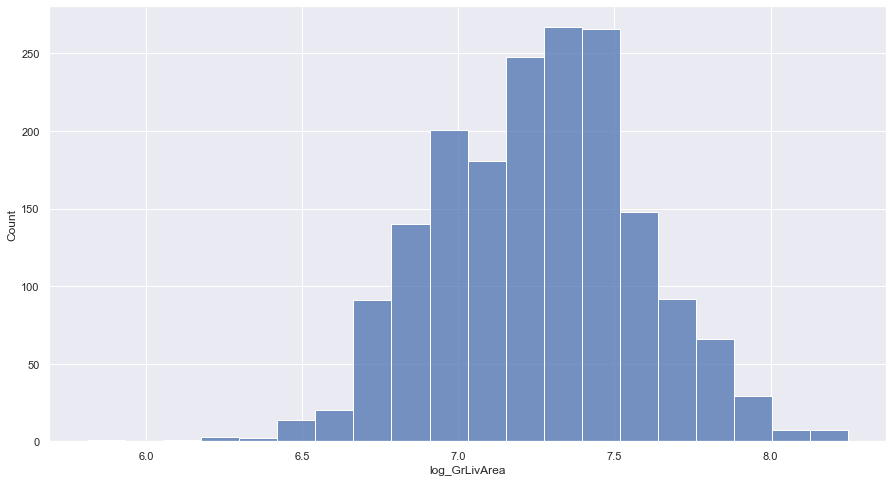

In [79]:
sns.histplot(data=housing, x='log_GrLivArea', bins=20);

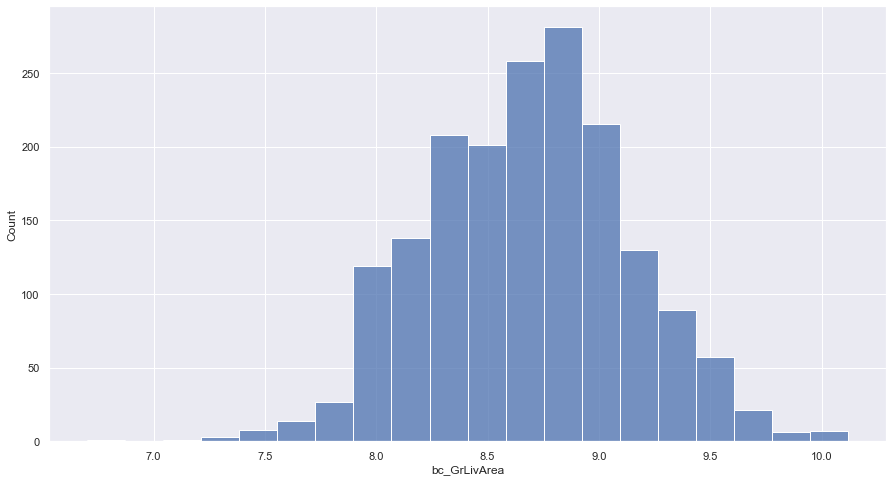

In [80]:
sns.histplot(data=housing, x='bc_GrLivArea', bins=20);

# 'LotArea'


In [189]:

# housing[['LotArea', 'SalePrice']].plot(kind='scatter', x='LotArea', y='SalePrice',logx=True, logy=True)

In [198]:
# sns.histplot(data=housing, x='LotArea', bins=20);

In [190]:
housing['log_LotArea'] = np.log(housing['LotArea'])

In [85]:
log_price.corr(housing['log_LotArea'])

0.398168479490573

In [197]:
# sns.histplot(data=housing, x='log_LotArea', bins=20);

In [88]:
log_price.corr(np.log(housing['LotArea'])) 

0.398168479490573

In [193]:
housing['bc_LotArea'],_ = stats.boxcox(housing['LotArea'])

In [194]:
log_price.corr(housing['bc_LotArea']) 

0.40638169167489485

In [196]:
# sns.histplot(housing.bc_LotArea, bins=20);

# MasVnrArea


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

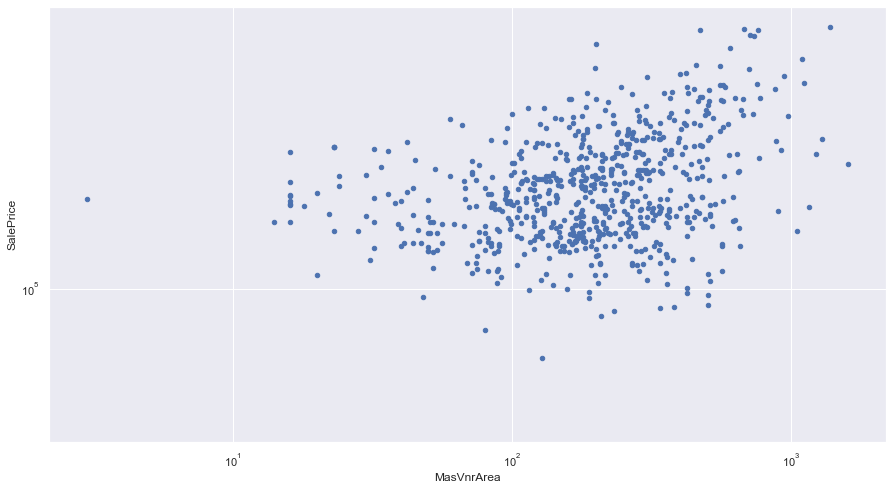

In [96]:
housing[['MasVnrArea', 'SalePrice']].plot(kind='scatter', x='MasVnrArea', y='SalePrice', logx=True, logy=True)

In [206]:
housing['yeo_MasVnrArea'],_ = stats.yeojohnson(housing['MasVnrArea'])

In [205]:
housing['log_MasVnrArea'] = np.log(housing['MasVnrArea'] + 1)

In [207]:
log_price.corr(housing['yeo_MasVnrArea']) 

0.4022418776868633

In [208]:
log_price.corr(np.log(housing['MasVnrArea'] + 1)) 

0.41764489461512283

In [204]:
# sns.histplot(data=housing, x='log_MasVnrArea', bins=20);

# BsmtUnfSF  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

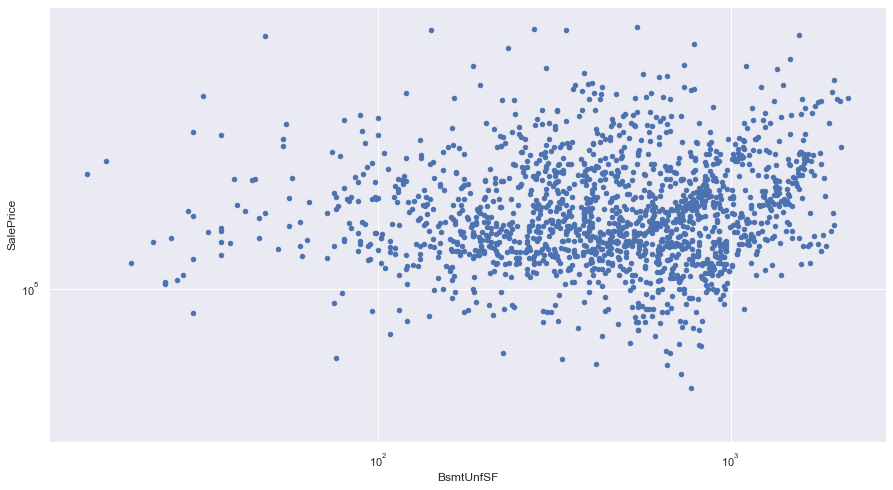

In [209]:

housing[['BsmtUnfSF', 'SalePrice']].plot(kind='scatter', x='BsmtUnfSF', y='SalePrice', logx=True, logy=True)

In [106]:
log_price.corr(np.log(housing['BsmtUnfSF']+1)) #correlation

0.1780290201769859

In [214]:
log_price.corr(housing['BsmtUnfSF']) #correlation

0.1902297317063011

In [211]:
housing['yeo_BsmtUnfSF'],_= stats.yeojohnson(housing['BsmtUnfSF'])

In [212]:
log_price.corr(np.log(housing['yeo_BsmtUnfSF']+1)) #correlation

0.17688182455361703

In [210]:
# housing[['BsmtUnfSF', 'SalePrice']].plot(kind='scatter', x='BsmtUnfSF', y='SalePrice', logx=True, logy=True)

# TotalBsmtSF 

In [221]:
# TotalBsmtSF 
# housing[['TotalBsmtSF', 'SalePrice']].plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', logx=True, logy=True)

In [217]:
housing['yeo_TotalBsmtSF'],_ = stats.yeojohnson(housing['TotalBsmtSF'])

In [216]:
log_TotalBsmtSF = np.log(housing['TotalBsmtSF'] + 1)
log_price = housing['log_price']

log_price.corr(log_TotalBsmtSF) #correlation

0.3767731935750898

In [218]:
log_price.corr(housing['yeo_TotalBsmtSF']) #correlation

0.6415234734620474

In [219]:
# sns.histplot(data=housing, x='TotalBsmtSF', bins=20);

In [220]:
# sns.histplot(data=housing, x='yeo_TotalBsmtSF', bins=20);

# 1stFlrSF

In [222]:
# 1stFlrSF

# housing[['1stFlrSF', 'SalePrice']].plot(kind='scatter', x='1stFlrSF', y='SalePrice', logx=True, logy=True)

In [116]:
first_FlrSF = housing[['1stFlrSF']]
log_first_FlrSF = np.log(housing['1stFlrSF'])

In [117]:
# log_price.corr(log_TotalBsmtSF) #correlation
log_price.corr(log_first_FlrSF)



0.6383392553634412

In [118]:
housing['log_first_FlrSF'] = np.log(housing['1stFlrSF'])

In [223]:
housing['bc_first_FlrSF'],_ = stats.boxcox(housing['1stFlrSF'])

In [224]:
log_price.corr(housing['bc_first_FlrSF'])

0.6374746531087248

#  2ndFlrSF

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

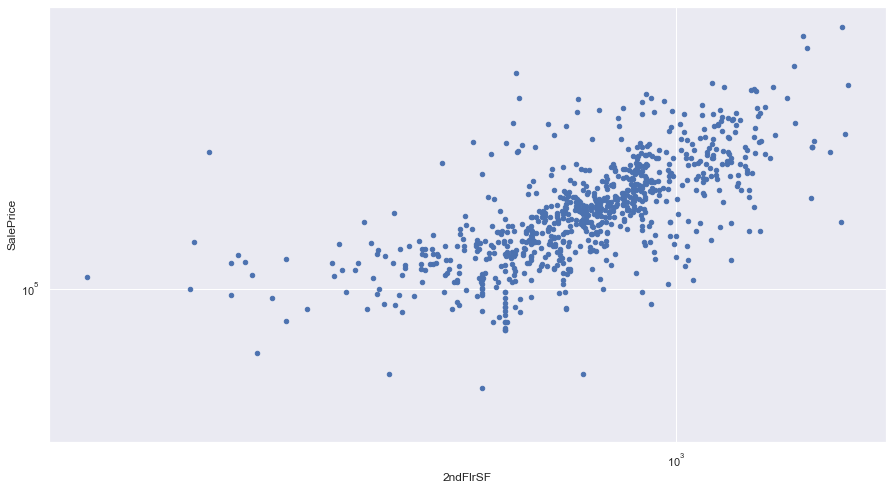

In [119]:
# 2ndFlrSF

housing[['2ndFlrSF', 'SalePrice']].plot(kind='scatter', x='2ndFlrSF', y='SalePrice', logx=True, logy=True)

In [120]:
log_price.corr(np.log(housing['2ndFlrSF'] + 1))

0.1192714622033411

In [225]:
log_price.corr(housing['2ndFlrSF'])

0.2693833571504791

In [121]:
housing['log_2ndFlrSF'] =np.log(housing['2ndFlrSF']+1)

In [122]:
housing['yeo_2ndFlrSF'],_ = stats.yeojohnson(housing['2ndFlrSF'])

In [123]:
log_price.corr(housing['yeo_2ndFlrSF'])  #very low correlation

0.10935394035398902

# LowQualFinSF: Low quality finished square feet (all floors)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

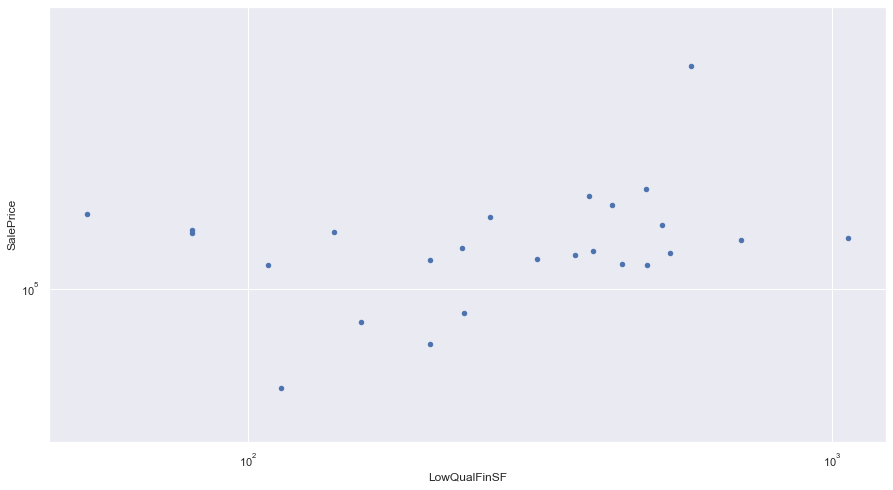

In [124]:
#LowQualFinSF: Low quality finished square feet (all floors)
housing[['LowQualFinSF', 'SalePrice']].plot(kind='scatter', x='LowQualFinSF', y='SalePrice', logx=True, logy=True)


# GarageArea 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

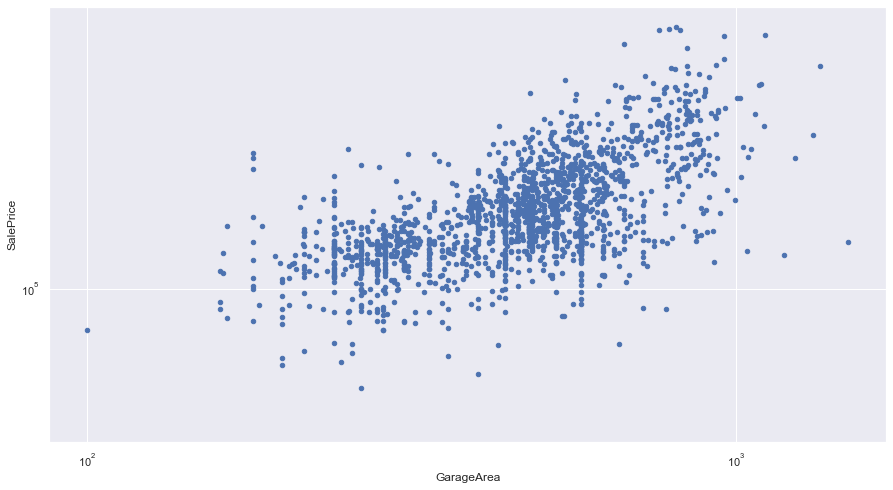

In [125]:
# GarageArea 

housing[['GarageArea', 'SalePrice']].plot(kind='scatter', x='GarageArea', y='SalePrice', logx=True, logy=True)

In [226]:
log_price.corr(np.log(housing['GarageArea'] + 1))

0.42854785247843596

In [227]:
housing['yeo_GarageArea'],_  = stats.yeojohnson(housing['GarageArea'] )

In [228]:
log_price.corr(housing['yeo_GarageArea'])

0.6518804606863746

# Correlation WoodDeckSF is 0.347 still could be taken into consideration for the model.  It may be important for the more expnsive homes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

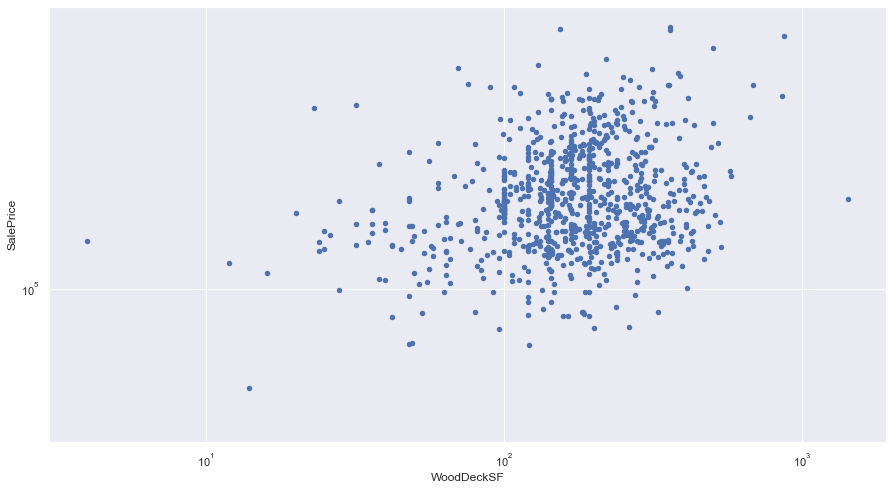

In [129]:
# WoodDeckSF 
housing[['WoodDeckSF', 'SalePrice']].plot(kind='scatter', x='WoodDeckSF', y='SalePrice', logx=True, logy=True)

In [130]:
log_price.corr(np.log(housing['WoodDeckSF'] + 1))


0.33374218051691723

In [229]:
log_price.corr(housing['WoodDeckSF'])

0.32520086718540625

In [131]:
housing['log_WoodDeckSF'] = np.log(housing['WoodDeckSF'] + 1)

In [132]:
housing['yeo_WoodDeckSF'],_ = stats.yeojohnson(housing['WoodDeckSF'])

In [133]:
log_price.corr(housing['yeo_WoodDeckSF'])

0.3315252703362067

In [134]:
housing['log_WoodDeckSF'] = np.log(housing['WoodDeckSF'] + 1)

#  OpenPorchSF 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

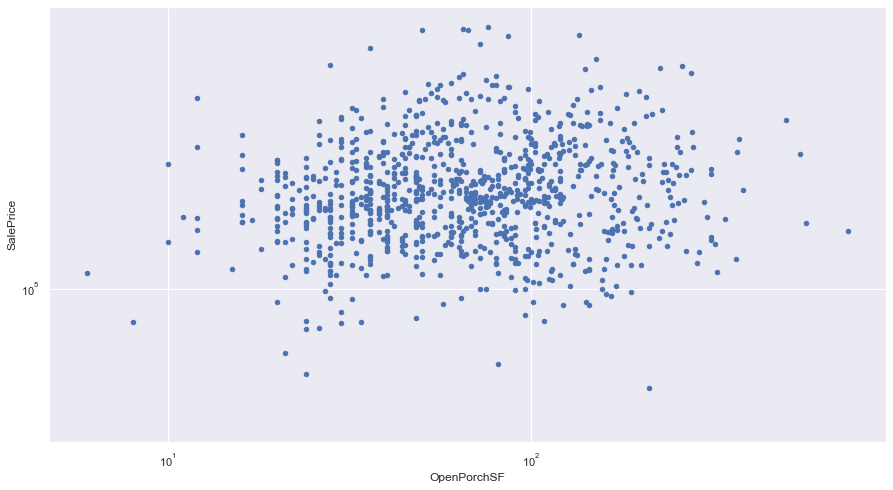

In [135]:
# OpenPorchSF 
housing[['OpenPorchSF', 'SalePrice']].plot(kind='scatter', x='OpenPorchSF', y='SalePrice', logx=True, logy=True)

In [230]:
log_price.corr(np.log(housing['OpenPorchSF'] + 1))

0.4660993488224769

In [233]:
housing['log_OpenPorchSF'] = np.log(housing['OpenPorchSF'] + 1)

In [232]:
housing['yeo_OpenPorchSF'],_ = stats.yeojohnson(housing['OpenPorchSF'])

In [234]:
log_price.corr(housing['yeo_OpenPorchSF'])

0.46592370339042405

# Pool

In [140]:
housing['has_pool'] = housing['PoolArea'] != 0

# 'LotFrontage' 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

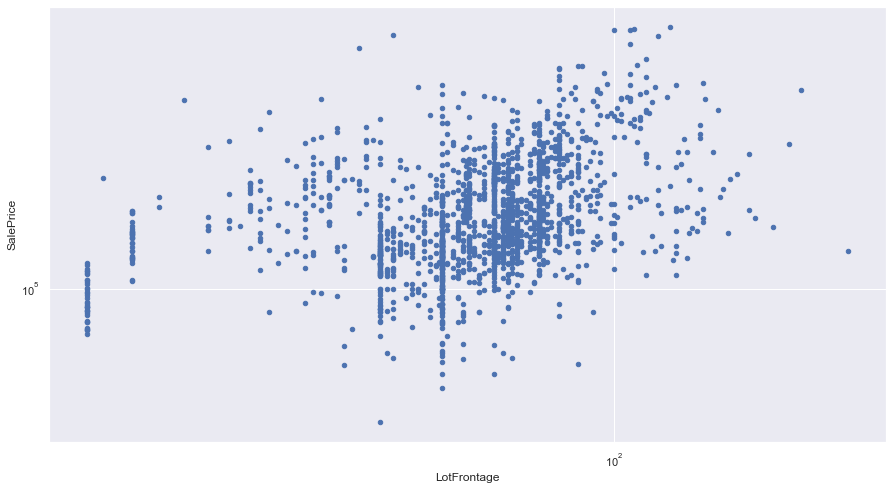

In [235]:



housing[['LotFrontage', 'SalePrice']].plot(kind='scatter', x='LotFrontage', y='SalePrice', logx=True, logy=True)

In [236]:
housing['yeo_LotFrontage'],_ = stats.yeojohnson(housing['LotFrontage'])

In [237]:
log_price.corr(housing['yeo_LotFrontage'])

0.3821738004287051

In [238]:
log_price.corr(np.log(housing['LotFrontage'] + 1))

0.36265343329195593

In [145]:
housing['log_LotFrontage']=np.log(housing['LotFrontage'] + 1)

In [146]:
housing['yeo_LotFrontage'],_ = stats.yeojohnson(housing['LotFrontage'])

In [147]:
log_price.corr(housing['yeo_LotFrontage'] )

0.3821738004287051

In [148]:
# seaborn scatter with reg line

In [149]:
# sns.lmplot(data=housing, x='log_LotFrontage', y='log_price', fit_reg= True)

In [150]:
# size_related.columns
# df_num.columns

# other_numerics = list(filter(lambda x: x not in size_related.columns, df_num.columns ))

In [251]:
# other_numerics = housing[other_numerics]

In [ ]:
# housing.info()

x="OverallQual", y="SalePrice"

# OverallQual

In [ ]:

sns.set_theme(style='darkgrid')

# tips = sns.load_dataset("tips")
ax = sns.barplot(x="OverallQual", y="SalePrice", data=housing, color='skyblue', ci=None)

x="OverallQual", y="log_price"

In [ ]:
sns.set_theme(style='darkgrid')

# tips = sns.load_dataset("tips")
ax = sns.barplot(x="OverallQual", y="log_price", data=other_numerics, color='skyblue', ci=None)

x="OverallCond", y="SalePrice"

# OverallCond

In [ ]:
ax = sns.barplot(x="OverallCond", y="SalePrice", data=other_numerics, color='skyblue' ,ci=None)

In [ ]:
sns.set_theme(style='darkgrid')

# tips = sns.load_dataset("tips")
ax = sns.barplot(x="OverallCond", y="log_price", data=other_numerics, color='skyblue' ,ci=None)

# YearBuilt  correation 0.5866

In [ ]:
housing[['YearBuilt', 'SalePrice']].plot(kind='scatter', x='YearBuilt', y='SalePrice',  logy=True) #logx=True,

In [ ]:
log_price.corr(housing['YearBuilt'])

In [ ]:
housing['YearBuilt'].corr(housing['YearRemodAdd'])

# YearRemodAdd  correlation 0.5656

In [ ]:
# YearRemodAdd

housing[['YearRemodAdd', 'SalePrice']].plot(kind='scatter', x='YearRemodAdd', y='SalePrice',  logy=True) #logx=True,

In [ ]:
# sns.heatmap(other_numerics.corr(), cmap="Blues", center=0); #cmap="Blues", cmap='RdBu',
# log_price.corr(housing['YearRemodAdd'])

# BsmtFinSF1: Type 1 finished square feet

In [ ]:
# BsmtFinSF1

# sns.set_theme(style='darkgrid')

# ax = sns.barplot(x="BsmtFinSF1", y="SalePrice", data=other_numerics, color='skyblue' ,ci=None)

housing[['BsmtFinSF1', 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', logx=True, logy=True) #,

In [239]:

housing['yeo_BsmtFinSF1'],_  = stats.yeojohnson(housing['BsmtFinSF1'])

In [240]:
housing['log_BsmtFinSF1'] = np.log(housing['BsmtFinSF1']+1)

In [241]:
log_price.corr(housing['BsmtFinSF1'])

0.441399960064673

In [242]:
log_price.corr(housing['yeo_BsmtFinSF1'])

0.2925749861878254

In [243]:
log_price.corr(housing['log_BsmtFinSF1'])

0.23332528008307393

In [ ]:
housing[['BsmtFinSF2', 'SalePrice']].plot(kind='scatter', x='BsmtFinSF2', y='SalePrice', logx=True, logy=True) #,, 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', logx=True, logy=True) #,

In [ ]:
# BsmtUnfSF  
housing[['BsmtUnfSF', 'SalePrice']].plot(kind='scatter', x='BsmtUnfSF', y='SalePrice', logx=True, logy=True) #,, 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', logx=True, logy=True) #,

In [244]:
log_price.corr(np.log(housing['BsmtUnfSF']+1))

0.1780290201769859

In [245]:
housing['log_BsmtUnfSF'] = np.log(housing['BsmtUnfSF']+1)

In [246]:
log_price.corr(housing['BsmtUnfSF'])

0.1902297317063011

In [ ]:
log_price.corr(np.log(housing['BsmtUnfSF']+1))

In [247]:
yeo_BsmtUnfSF,_ = pd.Series(stats.yeojohnson(housing['BsmtUnfSF']))
# log_price.corr(yeo_BsmtUnfSF)
yeo_BsmtUnfSF = pd.Series(yeo_BsmtUnfSF)
type(yeo_BsmtUnfSF)
log_price.corr(yeo_BsmtUnfSF)

0.06004277234424995

In [ ]:
# EnclosedPorch 

housing[['EnclosedPorch', 'SalePrice']].plot(kind='scatter', x='EnclosedPorch', y='SalePrice', logx=True, logy=True) #logx=True,    ,, 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', logx=True, logy=True) #,

In [248]:
log_price.corr(np.log(housing['EnclosedPorch']+1))

-0.22682247472091344

In [252]:
housing['log_EnclosedPorch'] = np.log(housing['EnclosedPorch']+1)

In [249]:
log_price.corr(housing['EnclosedPorch'])

-0.1657224564556693

In [ ]:
housing['log_EnclosedPorch'] = np.log(housing['EnclosedPorch'])

In [250]:
yeo_EnclosedPorch,_ = pd.Series(stats.yeojohnson(housing['EnclosedPorch']))
yeo_EnclosedPorch =pd.Series(yeo_EnclosedPorch)
log_price.corr(yeo_EnclosedPorch)

0.008708588182985626

In [ ]:
# BsmtFullBath 
housing[['BsmtFullBath', 'SalePrice']].plot(kind='scatter', x='BsmtFullBath', y='SalePrice',  logy=True) #logx=True,    ,, 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', logx=True, logy=True) #,

In [ ]:
# BsmtHalfBath 
housing[['BsmtHalfBath', 'SalePrice']].plot(kind='scatter', x='BsmtHalfBath', y='SalePrice',  logy=True) #logx=True,    ,, 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', logx=True, logy=True) #,

In [ ]:
# FullBath

housing[['FullBath', 'SalePrice']].plot(kind='scatter', x='FullBath', y='SalePrice',  logy=True) #logx=True,    ,, 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', logx=True, logy=True) #,

# create dummies from ceategoricals

In [254]:
categ = ['MSSubClass','MSZoning','Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', \
           'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
           'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', \
           'GarageFinish', 'PavedDrive', 'Fence', 'MoSold', 'SaleCondition' ]

for feature in categ:
    df = categ_check(
    df_name = housing,
    target_median = housing.SalePrice.median(),
    categ_feature = feature,
    target = 'SalePrice')
    print(df)
    print(' ')

    MSSubClass  category_freq  pct_total  median_of_target  index
0           60            347  19.450673          214000.0    133
1          120            118   6.614350          196000.0    122
2           75             13   0.728700          179500.0    112
3           80             78   4.372197          166250.0    103
4           20            632  35.426009          155000.0     96
5           70             86   4.820628          150000.0     93
6           85             34   1.905830          148000.0     92
7          150              1   0.056054          148400.0     92
8           90             60   3.363229          139500.0     87
9           40              5   0.280269          133000.0     83
10          50            196  10.986547          133000.0     83
11         160             76   4.260090          127500.0     79
12         190             35   1.961883          118000.0     73
13          45             12   0.672646          113000.0     70
14        

 
  MasVnrType  category_freq  pct_total  median_of_target  index
0      Stone            129   7.230942          224000.0    140
1    BrkFace            550  30.829596          185000.0    115
2       None           1092  61.210762          144050.0     90
3     BrkCmn             13   0.728700          139000.0     86
 
  Foundation  category_freq  pct_total  median_of_target  index
0       Wood              2   0.112108          207000.0    129
1      PConc            769  43.105381          206000.0    128
2     CBlock            782  43.834081          141250.0     88
3      Stone              5   0.280269          139900.0     87
4     BrkTil            198  11.098655          123000.0     76
5       Slab             28   1.569507          102350.0     64
 
  Heating  category_freq  pct_total  median_of_target  index
0    GasA           1760  98.654709          160000.0    100
1    GasW             15   0.840807          144000.0     90
2    OthW              2   0.112108        

# Based on Analysis Transformations to be used for modeling

In [253]:
housing['bc_GrLivArea'],_ = stats.boxcox(housing.GrLivArea)

housing['bc_LotArea'],_ = stats.boxcox(housing['LotArea'])

housing['log_MasVnrArea'] = np.log(housing['MasVnrArea'] + 1)

housing['yeo_TotalBsmtSF'],_ = stats.yeojohnson(housing['TotalBsmtSF'])

housing['log_first_FlrSF'] = np.log(housing['1stFlrSF'])

housing['yeo_GarageArea'],_  = stats.yeojohnson(housing['GarageArea'] )

housing['log_WoodDeckSF'] = np.log(housing['WoodDeckSF'] + 1)

housing['log_OpenPorchSF'] = np.log(housing['OpenPorchSF'] + 1)


housing['yeo_LotFrontage'],_ = stats.yeojohnson(housing['LotFrontage'])

housing['log_EnclosedPorch'] = np.log(housing['EnclosedPorch']+1)



In [ ]:
# OLD

# housing['bc_GrLivArea'],_ = stats.boxcox(housing.GrLivArea)
# housing['log_LotArea'] = np.log(housing['LotArea'])
# housing['log_MasVnrArea'] = np.log(housing['MasVnrArea'] + 1)
# housing['yeo_TotalBsmtSF'],_ = stats.yeojohnson(housing['TotalBsmtSF'])

# housing['log_first_FlrSF'] = np.log(housing['1stFlrSF'])

# housing['yeo_GarageArea'],_  = stats.yeojohnson(housing['GarageArea'] )
# housing['log_WoodDeckSF'] = np.log(housing['WoodDeckSF'] + 1)

# housing['log_OpenPorchSF'] = np.log(housing['OpenPorchSF'] + 1)

# housing['has_pool'] = housing['PoolArea'] != 0

# housing['log_BsmtFinSF1'] = np.log(housing['BsmtFinSF1']+1)

# #################################################################
# housing['log_2ndFlrSF'] =np.log(housing['2ndFlrSF']+1)

# housing['log_LotFrontage']=np.log(housing['LotFrontage'] + 1)

# housing['log_BsmtUnfSF'] = np.log(housing['BsmtUnfSF']+1)

# housing['log_EnclosedPorch'] = np.log(housing['EnclosedPorch']+1)


In [ ]:
#NEED TO RERUN IF READ IN DATA AGAIN

# housing.drop(["SalePrice"], axis = 1, inplace = True)

In [ ]:
# check
# housing.SalePrice

In [ ]:
#write out train data with transformations

# housing.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\train_transformed.csv')

In [ ]:
# code transformations for test data

In [ ]:
# check
# 
# x_test.SalePrice

In [ ]:
#write out test data with transformatio;ns

# x_test.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\test_transformed.csv')